# TASK 2(To Explore Supervised Machine Learning - LINEAR REGRESSION)

In [1]:
import pandas as pd 

In [2]:
Data_link = "http://bit.ly/w-data" 

In [3]:
data = pd.read_csv(Data_link)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

#positive linear relationship

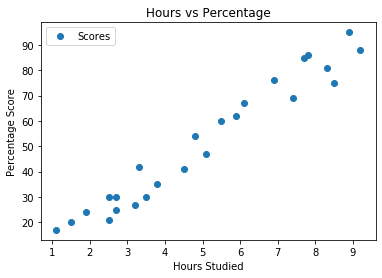

In [6]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#dividing and preparing the data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
data_x = data.drop(["Scores"], axis = 1)
data_y = data.Scores

In [9]:
data_x_train , data_x_test , data_y_train , data_y_test = train_test_split(data_x , data_y , test_size = .2 , random_state = 0)

In [10]:
from sklearn import linear_model

In [11]:
reg = linear_model.LinearRegression()

In [12]:
reg.fit(data_x_train , data_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
reg.coef_

array([9.91065648])

In [14]:
reg.intercept_

2.018160041434683

In [15]:
Rsquare = reg.score(data_x_train , data_y_train)
Rsquare

0.9515510725211553

In [16]:
data_x_train.shape

(20, 1)

In [17]:
K = 1
N = 20
AdjRsquare = 1 - (1-Rsquare) * (N-1) / (N-K-1)
AdjRsquare 

0.9488594654389974

In [18]:
line = reg.coef_* data_x + reg.intercept_

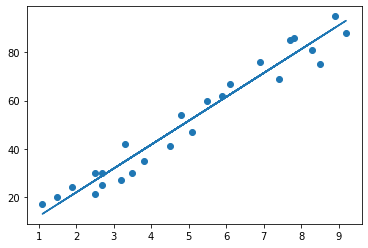

In [19]:
plt.scatter(data_x, data_y)
plt.plot(data_x, line);
plt.show()

#now doing prediction on test data

In [20]:
pred_test = reg.predict(data_x_test)
pred_test

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

#comparison between actual and predicted

In [21]:
df = pd.DataFrame({'Actual': data_y_test, 'Predicted': pred_test})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


#problem statement - What will be predicted score if a student study for 9.25 hrs in a day?

In [22]:
hours = [[9.25]]
own_pred = reg.predict(hours)
own_pred

array([93.69173249])

#answer - if a student studies 9.25 hours a day he will score 93 marks

#now calculating error in the builded model

In [23]:
error_test = data_y_test - pred_test
error_test 

5     3.115855
2    -6.732261
19   -6.357018
16    3.205199
11    1.508967
Name: Scores, dtype: float64

In [24]:
import seaborn as sns

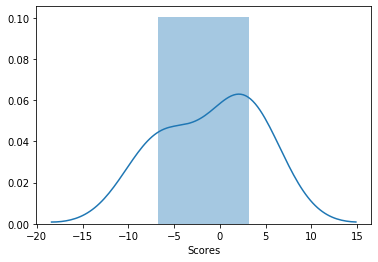

In [25]:
sns.distplot(error_test)

(array([2., 0., 0., 0., 0., 0., 0., 0., 1., 2.]),
 array([-6.73226078, -5.73851483, -4.74476887, -3.75102292, -2.75727696,
        -1.76353101, -0.76978506,  0.2239609 ,  1.21770685,  2.2114528 ,
         3.20519876]),
 <a list of 10 Patch objects>)

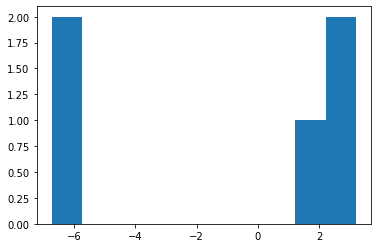

In [26]:
plt.hist(error_test)

In [27]:
import numpy as np

In [28]:
MSE = np.mean(error_test *error_test )
MSE                                                 #Mean Square Error

21.5987693072174

In [29]:
RMSE = np.power(MSE, .5)
RMSE                                                #Root Mean Square Error

4.6474476121003665

In [30]:
MAE = np.mean(np.absolute(error_test ))
MAE                                                 #Mean Absolute Error

4.183859899002975

In [31]:
MAPE = np.mean(np.absolute(error_test/ data_y_test)) * 100
MAPE                                                #Mean Absolute Percentage Error

12.568891617045663

In [32]:
Accuracy = 100 - MAPE
Accuracy

87.43110838295433

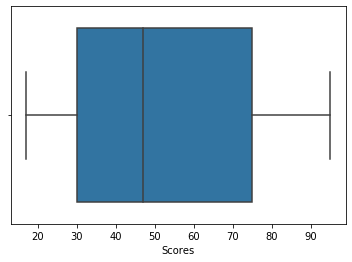

In [33]:
sns.boxplot(data.Scores)

#above boxplot shows that there are no outliers in the data and the model builded is quite fair

# Conclusion
#By seeing the regression model we can see that if a student studies for more hours, his percentage score will be higher.
#If a student studies for 9.25 hours he will score 93 marks approximately according to the model built.
#Model built has a accuracy of 87 which is quite good.
#It also shows very good values of Rsquare and AdjRsquare
#Model has very less Mean Absolute Error around 4 which shows that model is successful.